In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Импортируем спаршенные данные
df = pd.read_excel(r"aktsii.xlsx")
df

,TICKER,ЦЕНА,КОЛИЧЕСТВО АКЦИЙ,ПРИБЫЛЬ,ВЫРУЧКА,FCF,Собственный капитал (EQUITY),АКТИВЫ 2021,АКТИВЫ 2022,ROA,Балансовая стоиомтсь,Размер,Чистые активы,CEO's gender,CEO's age,CEO's education,CEO's qual
0,CIAN,595.20,69042400,480000000,8266000000,1802000000,5009000000,5600000000,6974000000,0.076348,5009000000,0.199181,5009000000,1,1,0,1
1,ETLN,79.98,383441416,13001000000,80556000000,-52016000000,74189000000,222098000000,248045000000,0.055307,74189000000,0.078900,74189000000,0,1,1,0
2,FIXP,295.50,850000000,21411000000,277644000000,24767000000,29267000000,84929000000,113026000000,0.216322,29267000000,0.073923,29267000000,0,1,0,1
3,GLTR,615.40,178740916,24919886000,94474032000,28752204000,67462195000,108284996000,110154102000,0.228163,67462195000,0.154419,67462195000,1,0,1,0
4,HHRU,2973.00,50635720,3691494000,18085164000,7219260000,6863685000,22782272000,23900880000,0.158151,6863685000,0.073514,6863685000,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,MAGE,4.45,145673254,-2561000000,11923000000,-2966000000,3484000000,14070000000,18478000000,-0.157368,3484000000,0.053521,3484000000,1,0,0,0
108,SAGO,3.15,3538928532,1122014000,40754572000,1227829000,6380626000,9205918000,10285896000,0.115127,6380626000,0.163675,6380626000,1,0,0,0
109,SAGO,3.15,521993080,1122014000,40754572000,1227829000,6380626000,9205918000,10285896000,0.115127,6380626000,0.163675,6380626000,0,1,0,1
110,SLEN,4.96,1237175444,-6295000000,12475000000,-3245000000,11461000000,38654000000,28941000000,-0.186256,11461000000,0.084777,11461000000,0,0,0,0


In [11]:
#Сгладим значения финансовых показателей, пролагорифмировав их

df["ПРИБЫЛЬ_log"] = np.log(df["ПРИБЫЛЬ"])
df["ВЫРУЧКА_log"] = np.log(df["ВЫРУЧКА"])
df["FCF_log"] = np.log(df["FCF"])


c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


В работе нам необходимо проверить, оказывает ли влияние на выручку, прибыль и FCF компании пол, возраст и уровень образования генерального директора. Прежде, чем строить модель, попробуем оценить с помощью гистограмм, как распределяются финансовые показатели фирмы в зависимости от характеристик CEO

###Анализ влияния пола директора на финансовые показатели

In [12]:
#Посмотрим на средние и медианные значения финансовых показателей по рынку. Как видим, среднее у мужчин выше, чем у женщин,
#В отношении всех исследуемых характеристик - выручки, прибыли и FCF

df_for_analyze = df[["CEO's gender", "ПРИБЫЛЬ", "ВЫРУЧКА", "FCF"]].replace([0,1], ["Male", "Female"])
df_for_analyze_mean = df_for_analyze.groupby(["CEO's gender"]).mean()/1000000
df_for_analyze_mean.round(2)
df_for_analyze_mean["ТИП"] = "Mean"

df_for_analyze_median = df_for_analyze.groupby(["CEO's gender"]).median()/1000000
df_for_analyze_median.round(2)
df_for_analyze_median["ТИП"] = "Median"

pd.concat([df_for_analyze_mean, df_for_analyze_median])

,ПРИБЫЛЬ,ВЫРУЧКА,FCF,ТИП
CEO's gender,,,,
Female,9314.754636,72471.978945,4938.054909,Mean
Male,48975.204737,459723.067193,32143.804825,Mean
Female,1833.000000,18085.164000,1009.687000,Median
Male,1740.240000,51502.000000,299.979000,Median


<Axes: xlabel='FCF_log', ylabel='Count'>

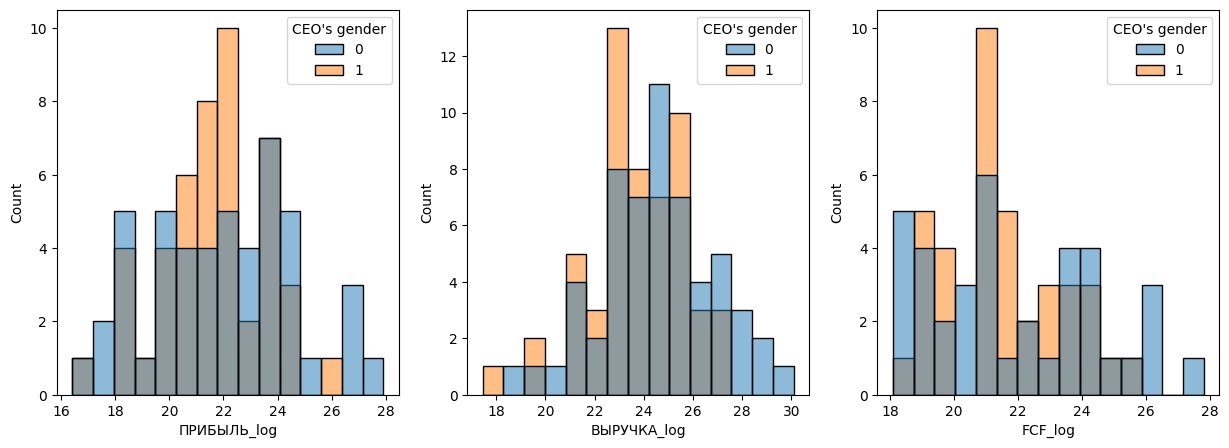

In [14]:
#Зависимость финансовых показателей от пола директора (0 - мужской пол, 1 - женский). Как мы видим, компании, где директор
#мужского пола, показывают финансовые результаты выше медианных значений по рынку. Можно считать, что эту переменную есть смысл 
#Включить в модель

f, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(df, x = "ПРИБЫЛЬ_log", bins=15, hue= """CEO's gender""", ax=axes[0])
sns.histplot(df, x = "ВЫРУЧКА_log", bins=15, hue= """CEO's gender""",  ax=axes[1])
sns.histplot(df, x = "FCF_log", bins=15, hue= """CEO's gender""", ax=axes[2])

###Анализ влияния возраста директора на финансовые показатели

In [17]:
#Посмотрим на средние и медианные значения финансовых показателей по рынку. В качестве "старых" считались директора
#Возраст которых превышал 40 лет. Как видим, среднее и медиана выше более старшего поколения CEO,
#В отношении всех исследуемых характеристик - выручки, прибыли и FCF

df_for_analyze = df[["CEO's age", "ПРИБЫЛЬ", "ВЫРУЧКА", "FCF"]].replace([0,1], ["Old", "Young"])
df_for_analyze_mean = df_for_analyze.groupby(["CEO's age"]).mean()/1000000
df_for_analyze_mean.round(2)
df_for_analyze_mean["ТИП"] = "Mean"

df_for_analyze_median = df_for_analyze.groupby(["CEO's age"]).median()/1000000
df_for_analyze_median.round(2)
df_for_analyze_median["ТИП"] = "Median"

pd.concat([df_for_analyze_mean, df_for_analyze_median])

,ПРИБЫЛЬ,ВЫРУЧКА,FCF,ТИП
CEO's age,,,,
Old,49202.630000,452805.239426,15825.836111,Mean
Young,11154.416466,98942.943845,21537.840431,Mean
Old,3041.097500,45565.682000,1133.914500,Median
Young,1271.000000,21721.063000,238.088000,Median


<Axes: xlabel='FCF_log', ylabel='Count'>

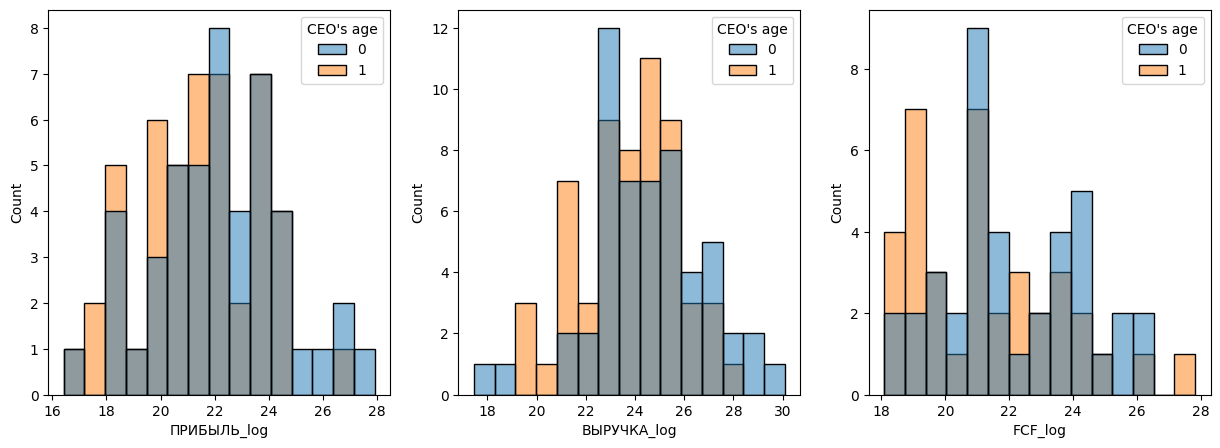

In [19]:
#Зависимость финансовых показателей от возраста директора (0 - старый, 1 - молодой). Как мы видим, компании, где директор
#более старый, показывают финансовые результаты выше медианных значений по рынку, лишь несколько самых высоких fcf оказались
# управляемыми молодёжью. Можно считать, что эту переменную есть смысл включить в модель

f, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(df, x = "ПРИБЫЛЬ_log", bins=15, hue= """CEO's age""", ax=axes[0])
sns.histplot(df, x = "ВЫРУЧКА_log", bins=15, hue= """CEO's age""",  ax=axes[1])
sns.histplot(df, x = "FCF_log", bins=15, hue= """CEO's age""", ax=axes[2])

###Анализ влияния уровня образования директора на финансовые показатели

In [23]:
#Посмотрим на средние и медианные значения финансовых показателей по рынку.
#Обладатели CFA имеют более высокие показатели выручки, прибыли и fcf

df_for_analyze = df[["CEO's education", "ПРИБЫЛЬ", "ВЫРУЧКА", "FCF"]].replace([0,1], ["No CFA", "CFA"])
df_for_analyze_mean = df_for_analyze.groupby(["CEO's education"]).mean()/1000000
df_for_analyze_mean.round(2)
df_for_analyze_mean["ТИП"] = "Mean"

df_for_analyze_median = df_for_analyze.groupby(["CEO's education"]).median()/1000000
df_for_analyze_median.round(2)
df_for_analyze_median["ТИП"] = "Median"

pd.concat([df_for_analyze_mean, df_for_analyze_median])

,ПРИБЫЛЬ,ВЫРУЧКА,FCF,ТИП
CEO's education,,,,
CFA,41900.134981,380270.014528,35209.693151,Mean
No CFA,18359.169847,170099.371220,4028.409458,Mean
CFA,3611.000000,42642.000000,553.083000,Median
No CFA,1461.649000,18220.070000,299.979000,Median


<Axes: xlabel='FCF_log', ylabel='Count'>

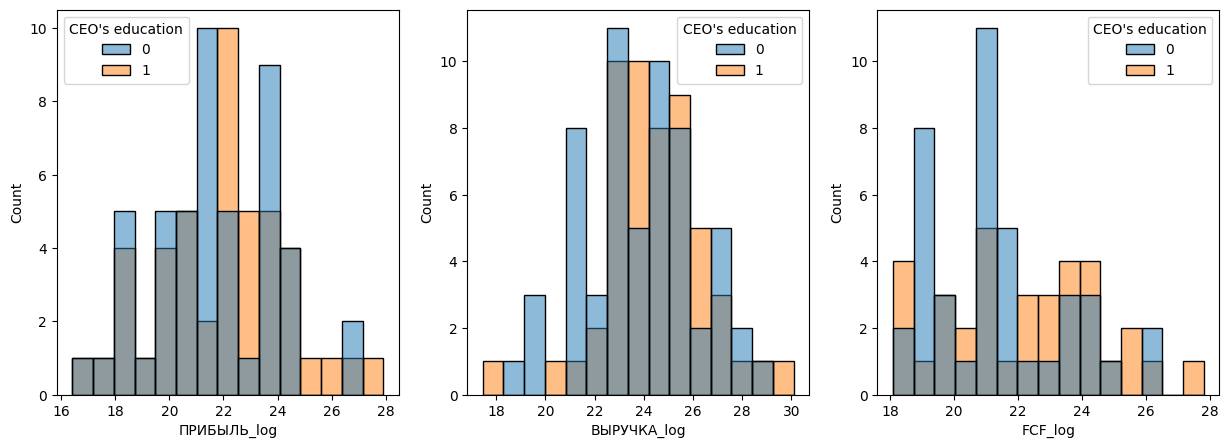

In [25]:
#Зависимость финансовых показателей от образования директора (0 - no CFA, 1 - CFA). Анализ гистограм неоднозначен и на первый
#Взгляд зависимости между сертификацией и финансовыми показателями несущественная.

f, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(df, x = "ПРИБЫЛЬ_log", bins=15, hue= """CEO's education""", ax=axes[0])
sns.histplot(df, x = "ВЫРУЧКА_log", bins=15, hue= """CEO's education""",  ax=axes[1])
sns.histplot(df, x = "FCF_log", bins=15, hue= """CEO's education""", ax=axes[2])

<Axes: >

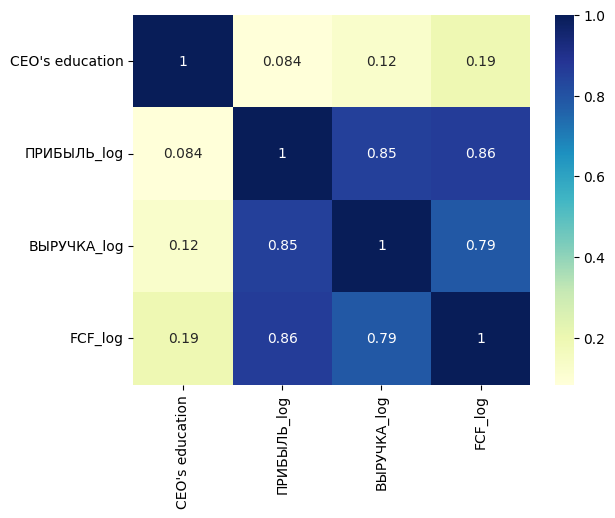

In [35]:
#Построив корреляционную матрицу, дополнительно убидимся, что зависимость между CFA и финансовыми показателями минимальна


correlation  = df[["CEO's education", "ПРИБЫЛЬ_log", "ВЫРУЧКА_log", "FCF_log"]]
sns.heatmap(correlation.corr(), cmap="YlGnBu", annot=True)